# Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_pickle('dataframe.pkl')

In [7]:
df.head()

,population,growth,households,median_age,per_cap_income,hh_income,labor_force,unempl_rate,poverty_rate,hs_rate,college_rate,close_elect
0,55504.0,1.7,20800.0,37.8,39721.0,54487.0,25909.0,3.9,13.5,87.6,24.6,0
1,212628.0,16.7,75149.0,42.3,41286.0,56460.0,91567.0,4.0,11.7,90.0,29.5,0
2,25270.0,-8.0,9122.0,38.7,31788.0,32884.0,8236.0,5.9,29.9,73.8,12.9,1
3,22668.0,-1.1,7048.0,40.2,29264.0,43079.0,8506.0,4.4,20.1,80.7,12.0,0
4,58013.0,1.2,20619.0,40.8,31470.0,47213.0,24494.0,4.0,14.1,80.0,13.0,0


In [8]:
# drop rows with nans

df = df.dropna()

In [9]:
# inspect mean values of features for not-close vs close outcomes

df.groupby('close_elect').mean()

,population,growth,households,median_age,per_cap_income,hh_income,labor_force,unempl_rate,poverty_rate,hs_rate,college_rate
close_elect,,,,,,,,,,,
0,96130.213511,0.654778,34849.730837,41.203920,40616.088554,49092.827791,47259.882744,4.601295,15.904970,85.634162,20.188939
1,200647.364865,2.259009,71924.959459,39.253604,42160.738739,53460.472973,100270.324324,4.683333,15.774775,87.963514,26.509910


## Model Preprocessing
- Calculate null accuracy
- Define feature matrix and response vector
- Split data into test/train
- Scale feature (X) matricies

In [8]:
# null model accuracy - guess '0' every time

(df['close_elect'] == 0).sum() / len(df)

0.9278986683988308

In [9]:
# initialize feature matrix and observed outcome

X = df.iloc[:, 0:11]
y = df.iloc[:, 11]

In [46]:
from sklearn.cross_validation import train_test_split

# test/train split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
from imblearn.over_sampling import SMOTE

# smote to increase underrepresented sampling

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [48]:
# standardize training set
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

# transform train data
X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train)

# transform test data
X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test)

## Random Forest

In [49]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_train_pred = cross_val_predict(random_forest, X_train, y_train, cv=10)

In [55]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train, y_train_pred)

array([[1843,  158],
       [ 118, 1883]])

In [51]:
from sklearn.metrics import precision_score, recall_score

# report precision and recall values
print("Precision: ", precision_score(y_train, y_train_pred))
print("Recall: ", recall_score(y_train, y_train_pred))

Precision:  0.9225869671729544
Recall:  0.9410294852573713


In [52]:
from sklearn.metrics import f1_score

print("F1: ", f1_score(y_train, y_train_pred))

F1:  0.9317169717961405


In [53]:
random_forest.predict_proba(X_test)

array([[1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       ...,
       [0. , 1. ],
       [0.9, 0.1],
       [0.9, 0.1]])

In [43]:
# grid search



In [40]:
from sklearn.metrics import classification_report

y_test_pred = random_forest.predict(X_test)
print(classification_report(y_test, y_test_pred))

             precision    recall  f1-score   support

          0       0.93      1.00      0.96       856
          1       0.00      0.00      0.00        68

avg / total       0.86      0.93      0.89       924



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [34]:
from sklearn.metrics import precision_recall_curve

#y_train_scores = cross_val_predict(random_forest, X_train_trans, y_train, cv=10,
 #                                method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_res, y_train_pred)

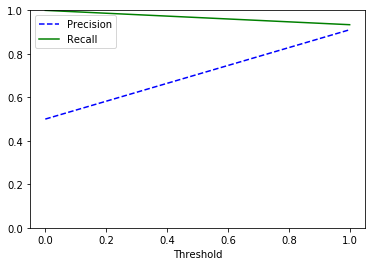

In [35]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds): 
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision") 
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall") 
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [36]:
random_forest.feature_importances_

array([0.09619245, 0.08090887, 0.07233008, 0.06548903, 0.08520077,
       0.07662663, 0.1017595 , 0.07168259, 0.081677  , 0.08928076,
       0.17885233])

In [37]:
list(zip(df.columns[0:-1], random_forest.feature_importances_))

[('population', 0.09619245104254423),
 ('growth', 0.08090886535467415),
 ('households', 0.07233008425730365),
 ('median_age', 0.06548903309389023),
 ('per_cap_income', 0.08520076627673559),
 ('hh_income', 0.0766266290309737),
 ('labor_force', 0.10175949954022057),
 ('unempl_rate', 0.07168258651918491),
 ('poverty_rate', 0.08167699540216622),
 ('hs_rate', 0.08928076082936764),
 ('college_rate', 0.17885232865293904)]

## Logistic Regression

## SVM

In [80]:
from sklearn import svm
from sklearn import model_selection

In [81]:
rbf_svm = svm.SVC(kernel='rbf')
rbf_svm.fit(X_train, y_train)
rbf_svm.score(X_test, y_test)

0.7326839826839827

param_grid = {
    "C": np.logspace(2, -5, 10),
    "gamma": np.logspace(1, -5, 10),
}

rbf_grid = model_selection.RandomizedSearchCV(
    rbf_svm, param_grid, verbose=2, n_jobs=-1, cv=5, n_iter=15)

rbf_grid.fit(X_train, y_train);

rbf_grid.best_params_

rbf_grid.best_score_

rbf_model = rbf_grid.best_estimator_
rbf_model.fit(X_train,y_train)

In [82]:
from sklearn import metrics 

y_pred = rbf_model.predict(X_test)

metrics.confusion_matrix(y_test,y_pred)

array([[853,   3],
       [ 66,   2]])

In [78]:
from sklearn import decomposition
import seaborn
%pylab inline

y_colors = seaborn.color_palette("hls", 2)

def plot_decision(x, y, clf, num_points=10000):

    n = np.sqrt(num_points) // 1

    pca = decomposition.PCA(n_components=2)
    x_t = pca.fit_transform(x)

    x0_min, x0_max = x_t[:, 0].min() - 1, x_t[:, 0].max() + 1
    x1_min, x1_max = x_t[:, 1].min() - 1, x_t[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x0_min, x0_max, num=n), np.linspace(x1_min, x1_max, num=n))

    mesh_points = np.concatenate(
        (xx.reshape(-1, 1), yy.reshape(-1, 1)), axis=1)

    x_inv = pca.inverse_transform(mesh_points)
    Z = clf.predict(x_inv)
    Z = Z.reshape(xx.shape)

    c_colors = [y_colors[int(i)] for i in unique(Z)]
    plt.contourf(xx, yy, Z, colors=y_colors, levels=arange(10), alpha=.5)

    target_labels = unique(y)
    for i, label in enumerate(target_labels):
        plt.scatter(
            x_t[y == i, 0],
            x_t[y == i, 1],
            c=y_colors[i],
            label=label,
            alpha=.5,
            edgecolors="black")
    # plt.scatter(mesh_points[:,0], mesh_points[:,1], marker="X")
    xlabel("1st pricinple component")
    ylabel("2st pricinple component")
    legend()

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


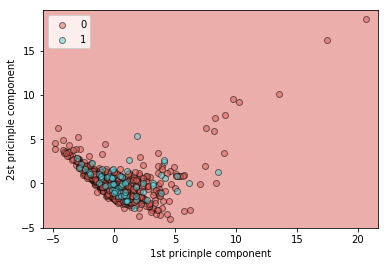

In [79]:
plot_decision(X_test, y_test, rbf_model, num_points=60000)

## Decision Tree